Import Packages

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [24]:
parent_dir = '../../data/count/'

N = 5_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}2/counting_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}2/counting_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}2/counting_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}2/counting_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [25]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 09:19:15 2025 +0100) (510.63ms ela...,0.315,0.0284,0.638,2.36,0.16,10.98,52.51 C,Nominal
1,(Sat Mar 29 09:19:15 2025 +0100) (508.08ms ela...,0.373,0.0563,0.729,1.44,0.22,14.46,52.04 C,Nominal
2,(Sat Mar 29 09:19:16 2025 +0100) (505.26ms ela...,1.140,0.0301,0.708,2.12,0.27,20.07,52.04 C,Nominal
3,(Sat Mar 29 09:19:16 2025 +0100) (508.68ms ela...,0.216,0.0253,0.466,0.97,0.16,11.17,51.57 C,Nominal
4,(Sat Mar 29 09:19:17 2025 +0100) (508.89ms ela...,0.231,0.0231,0.428,0.94,0.17,11.74,51.57 C,Nominal


In [26]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(112, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 09:19:26 2025 +0100) (108.71ms ela...,34.0,0.05610,1.570,35.50,3.65,97.59,49.84 C,Nominal
1,(Sat Mar 29 09:19:26 2025 +0100) (104.40ms ela...,32.5,0.03100,0.989,33.42,3.55,98.79,49.84 C,Nominal
2,(Sat Mar 29 09:19:26 2025 +0100) (106.16ms ela...,28.8,0.03510,0.742,29.67,3.27,96.03,49.84 C,Nominal
3,(Sat Mar 29 09:19:26 2025 +0100) (105.44ms ela...,28.4,0.00868,0.989,29.62,3.06,92.50,52.70 C,Nominal
4,(Sat Mar 29 09:19:26 2025 +0100) (106.64ms ela...,38.8,0.03210,0.821,39.50,3.90,97.85,52.70 C,Nominal


In [27]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 09:17:55 2025 +0100) (509.11ms ela...,3.9900,0.00000,0.466,4.48,0.79,75.73,43.47 C,Nominal
1,(Sat Mar 29 09:17:56 2025 +0100) (507.81ms ela...,0.3410,0.04220,0.424,0.66,0.21,18.85,43.47 C,Nominal
2,(Sat Mar 29 09:17:56 2025 +0100) (508.19ms ela...,0.0548,0.00000,0.248,0.09,0.03,2.11,43.51 C,Nominal
3,(Sat Mar 29 09:17:57 2025 +0100) (509.34ms ela...,2.8700,0.00587,0.506,3.15,0.46,34.78,43.51 C,Nominal
4,(Sat Mar 29 09:17:57 2025 +0100) (508.46ms ela...,0.0573,0.00000,0.246,0.09,0.03,2.09,43.54 C,Nominal


In [28]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(63, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 29 09:18:06 2025 +0100) (111.18ms ela...,14.0,0.0,0.273,14.56,1.53,95.95,44.10 C,Nominal
1,(Sat Mar 29 09:18:06 2025 +0100) (106.31ms ela...,14.1,0.0,0.268,14.54,1.53,95.93,44.10 C,Nominal
2,(Sat Mar 29 09:18:06 2025 +0100) (105.48ms ela...,14.0,0.0,0.265,14.46,1.52,96.51,44.10 C,Nominal
3,(Sat Mar 29 09:18:06 2025 +0100) (106.86ms ela...,13.8,0.0,0.264,14.27,1.47,95.02,44.10 C,Nominal
4,(Sat Mar 29 09:18:07 2025 +0100) (106.09ms ela...,13.6,0.0,0.269,14.01,1.42,96.83,44.10 C,Nominal


Clean the Data

In [29]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [30]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [31]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 09:19:15,0.315,0.0284,0.638,2.36,0.16,10.98,52.51,Nominal,510.63
1,2025-03-29 09:19:15,0.373,0.0563,0.729,1.44,0.22,14.46,52.04,Nominal,508.08
2,2025-03-29 09:19:16,1.140,0.0301,0.708,2.12,0.27,20.07,52.04,Nominal,505.26
3,2025-03-29 09:19:16,0.216,0.0253,0.466,0.97,0.16,11.17,51.57,Nominal,508.68
4,2025-03-29 09:19:17,0.231,0.0231,0.428,0.94,0.17,11.74,51.57,Nominal,508.89


In [32]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(112, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 09:19:26,34.0,0.05610,1.570,35.50,3.65,97.59,49.84,Nominal,108.71
1,2025-03-29 09:19:26,32.5,0.03100,0.989,33.42,3.55,98.79,49.84,Nominal,104.40
2,2025-03-29 09:19:26,28.8,0.03510,0.742,29.67,3.27,96.03,49.84,Nominal,106.16
3,2025-03-29 09:19:26,28.4,0.00868,0.989,29.62,3.06,92.50,52.70,Nominal,105.44
4,2025-03-29 09:19:26,38.8,0.03210,0.821,39.50,3.90,97.85,52.70,Nominal,106.64


In [33]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 09:17:55,3.9900,0.00000,0.466,4.48,0.79,75.73,43.47,Nominal,509.11
1,2025-03-29 09:17:56,0.3410,0.04220,0.424,0.66,0.21,18.85,43.47,Nominal,507.81
2,2025-03-29 09:17:56,0.0548,0.00000,0.248,0.09,0.03,2.11,43.51,Nominal,508.19
3,2025-03-29 09:17:57,2.8700,0.00587,0.506,3.15,0.46,34.78,43.51,Nominal,509.34
4,2025-03-29 09:17:57,0.0573,0.00000,0.246,0.09,0.03,2.09,43.54,Nominal,508.46


In [34]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(63, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-29 09:18:06,14.0,0.0,0.273,14.56,1.53,95.95,44.1,Nominal,111.18
1,2025-03-29 09:18:06,14.1,0.0,0.268,14.54,1.53,95.93,44.1,Nominal,106.31
2,2025-03-29 09:18:06,14.0,0.0,0.265,14.46,1.52,96.51,44.1,Nominal,105.48
3,2025-03-29 09:18:06,13.8,0.0,0.264,14.27,1.47,95.02,44.1,Nominal,106.86
4,2025-03-29 09:18:07,13.6,0.0,0.269,14.01,1.42,96.83,44.1,Nominal,106.09


Visualize the Data

In [35]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


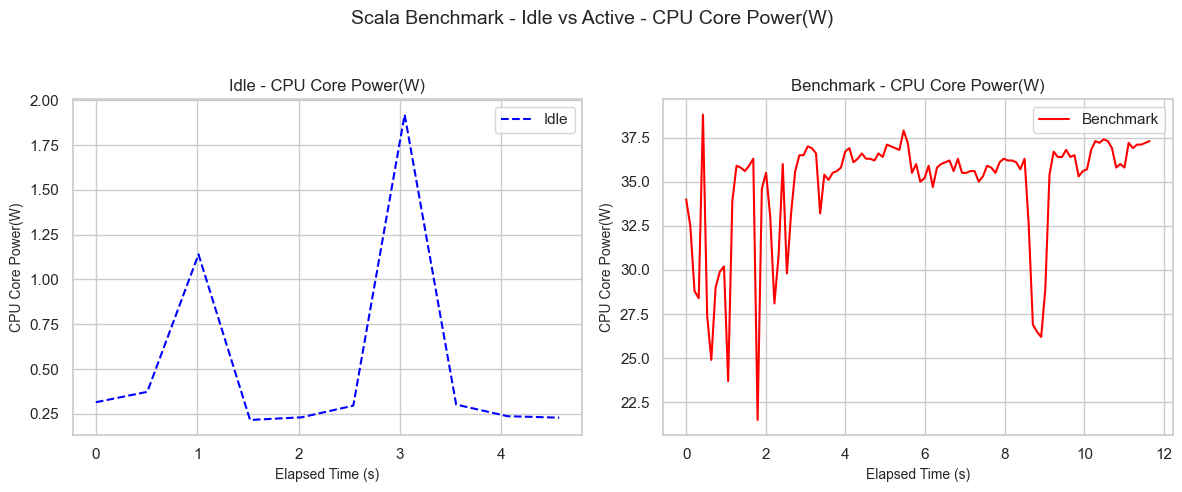

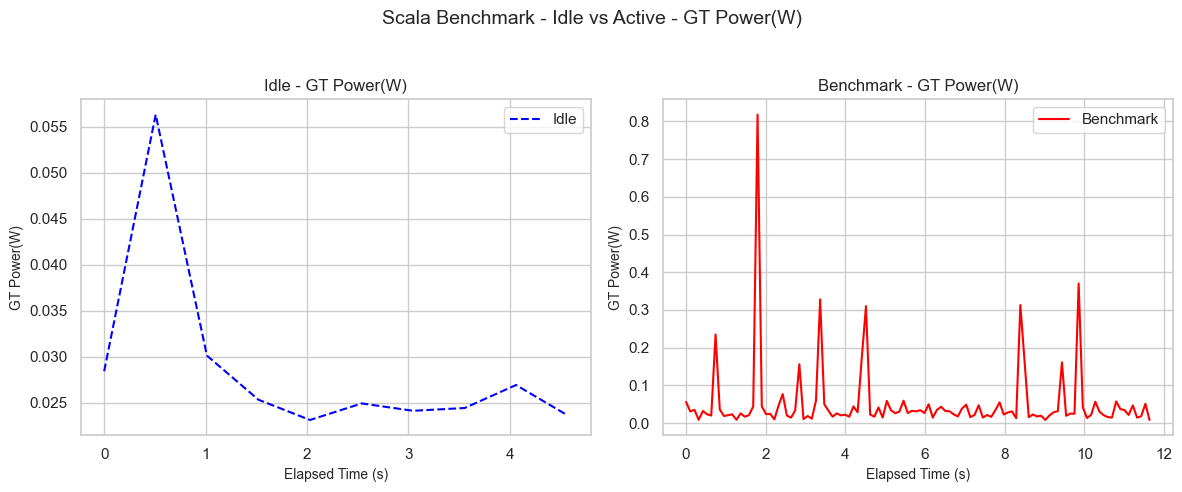

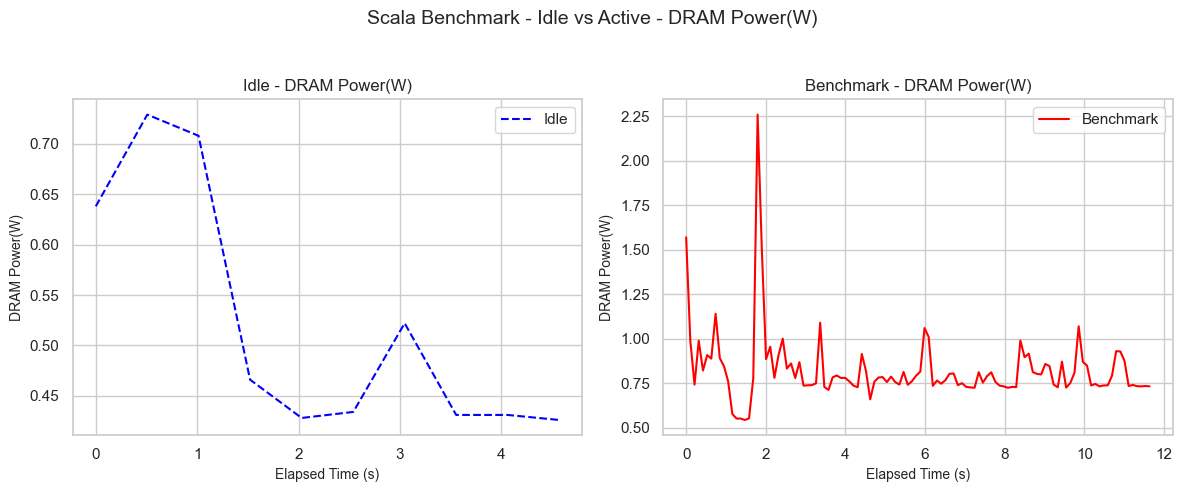

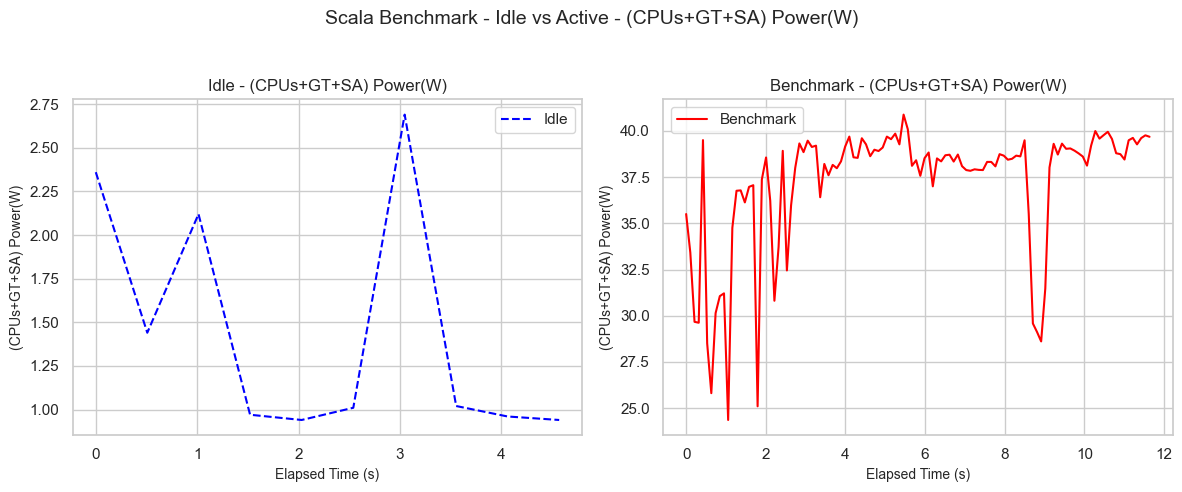

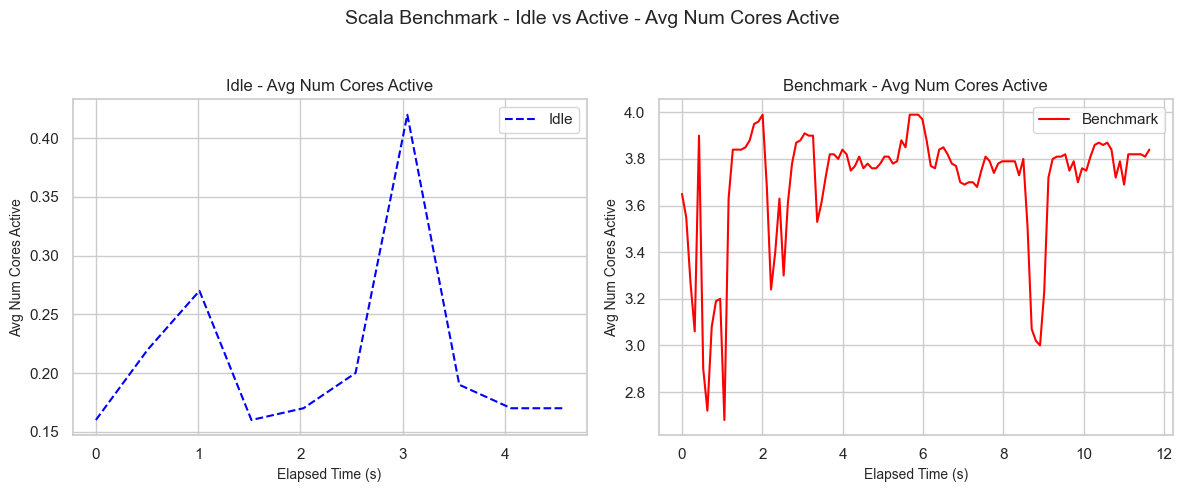

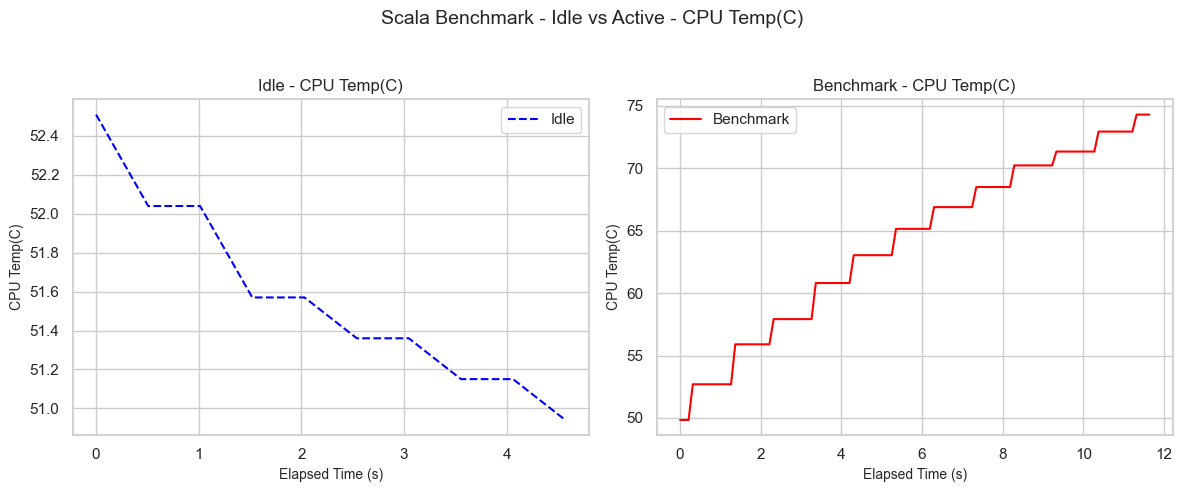

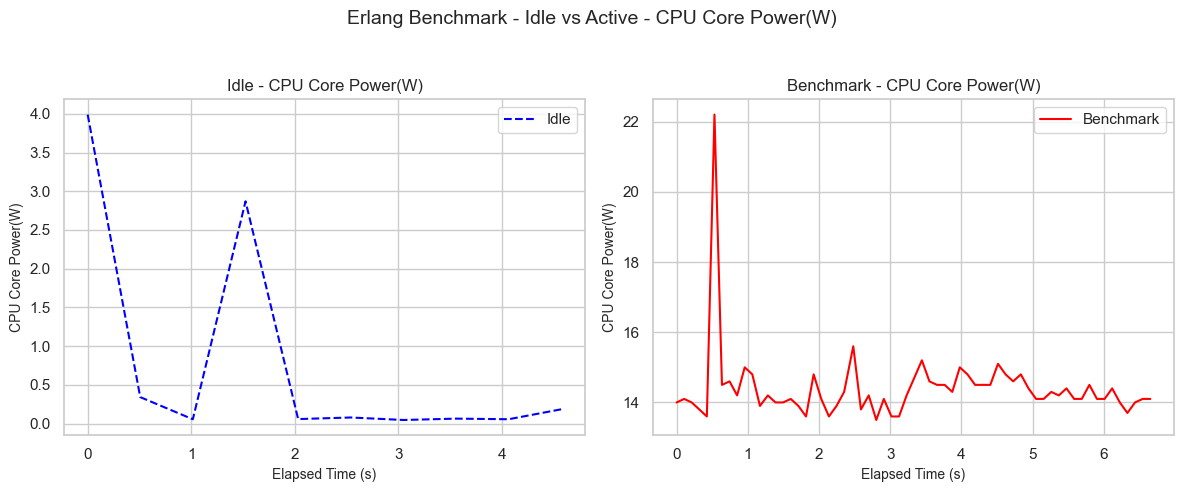

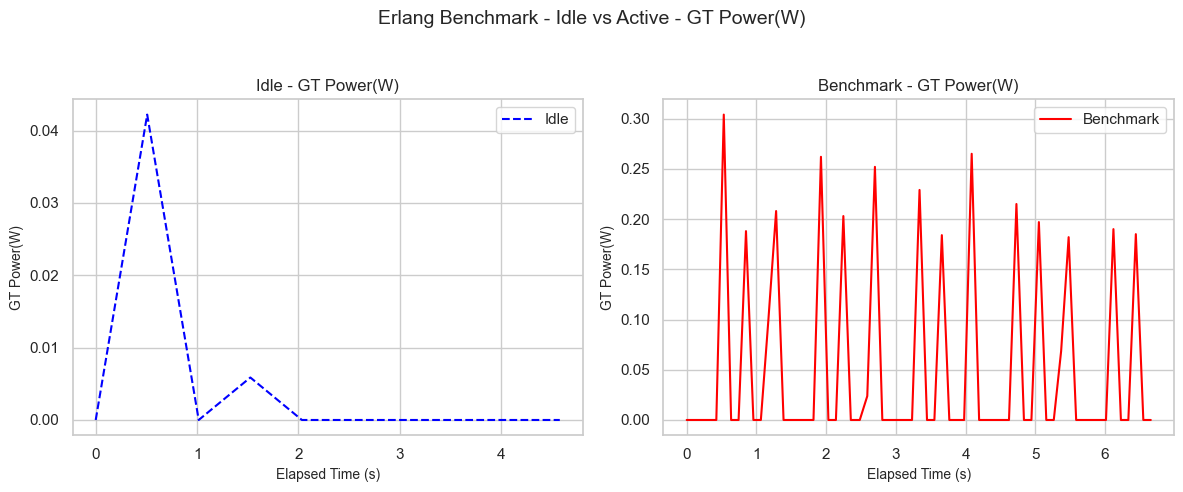

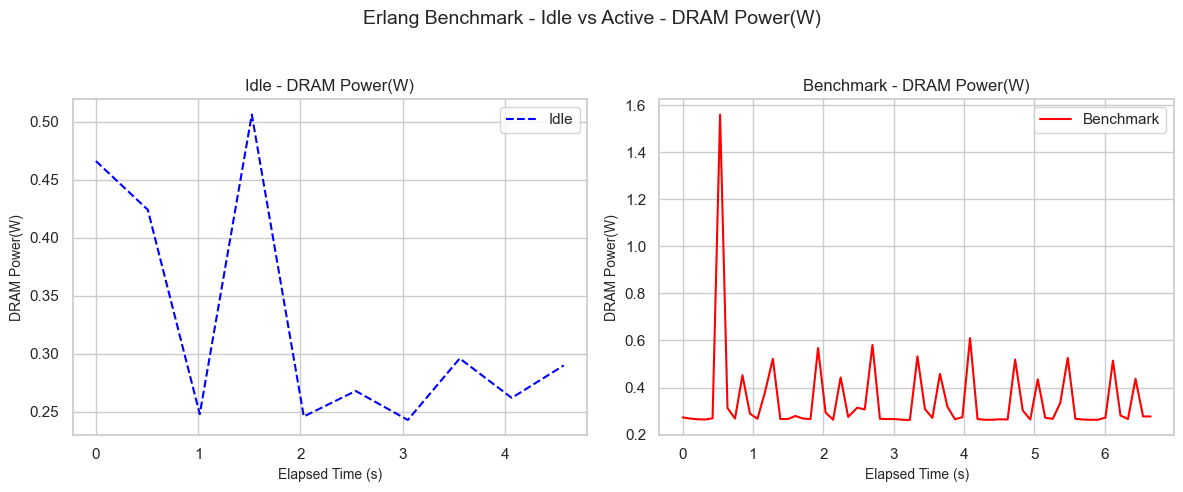

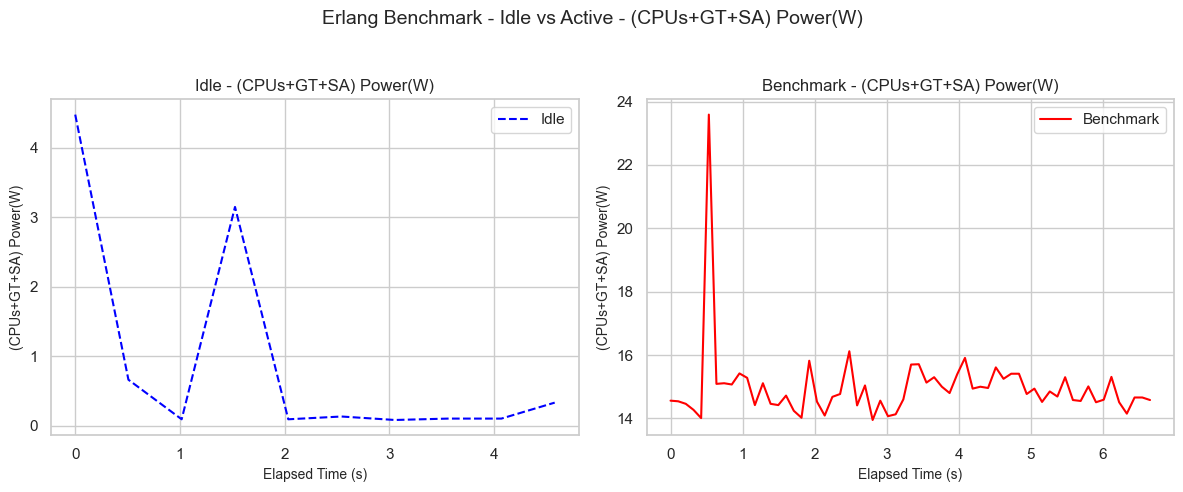

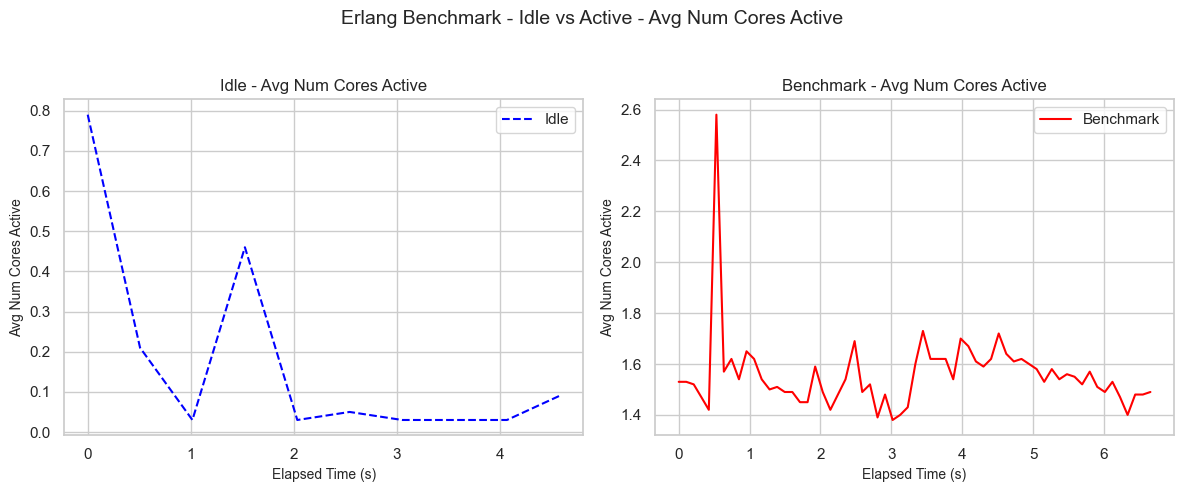

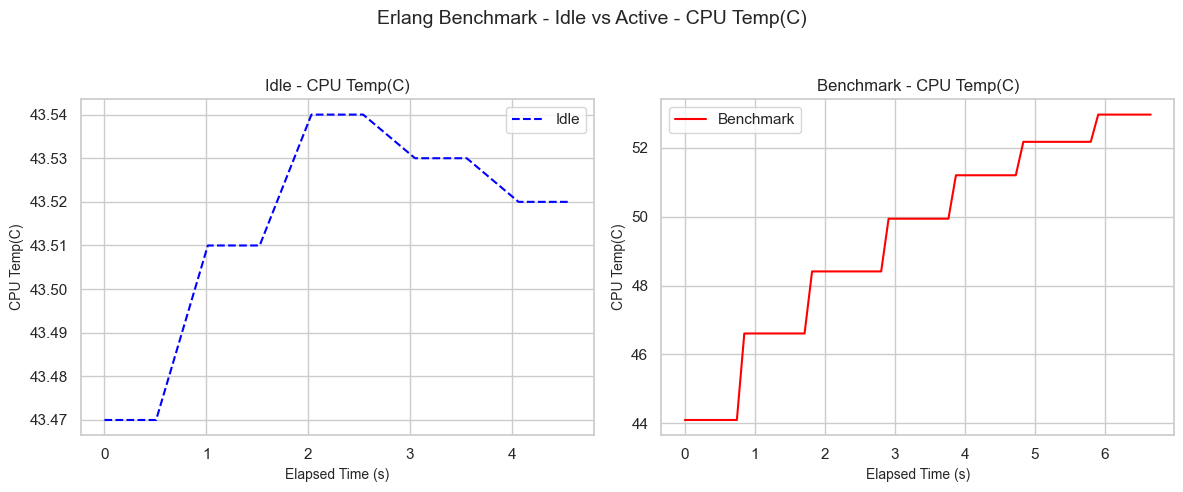

In [36]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [37]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [38]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
title_config_prefix = f"({n} Messages, {ITERATIONS} Iterations)"

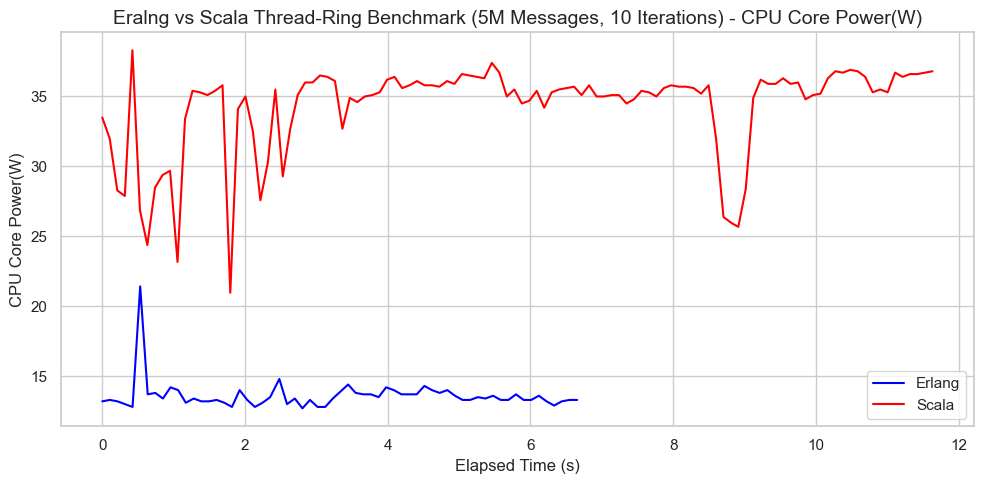

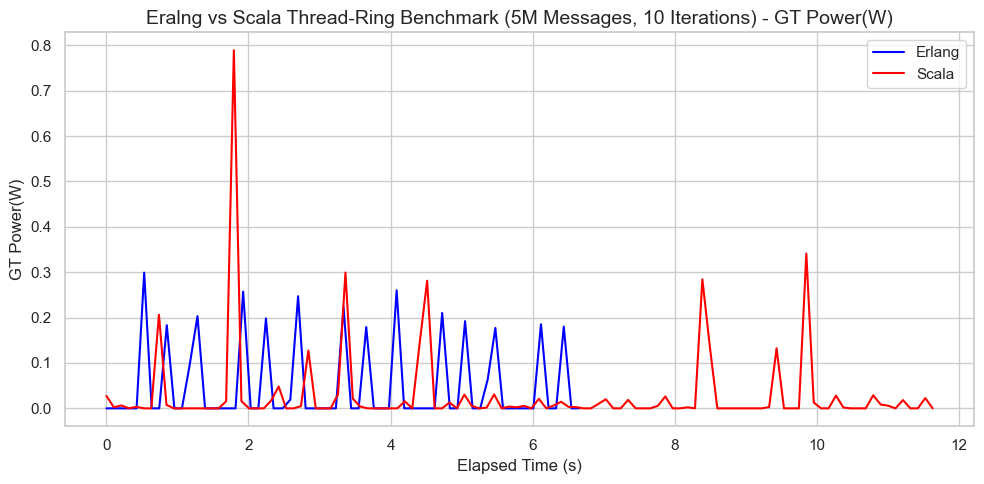

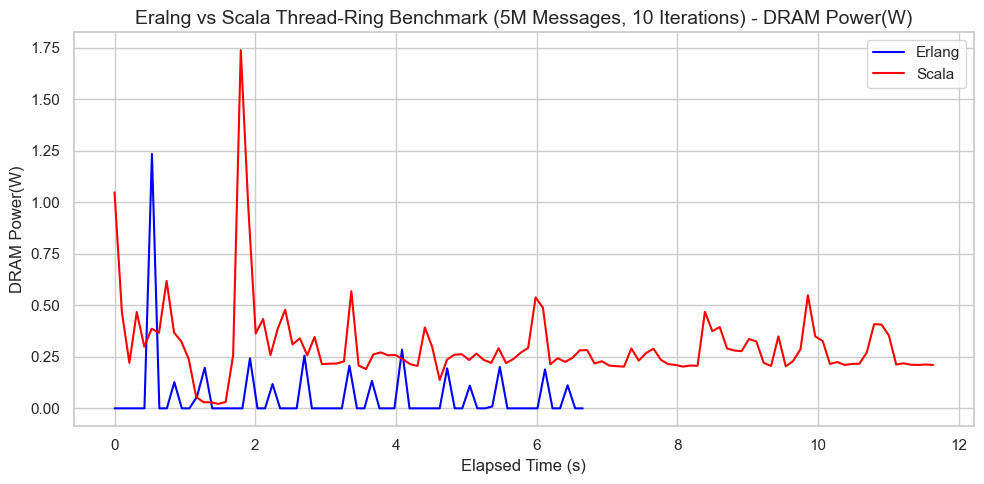

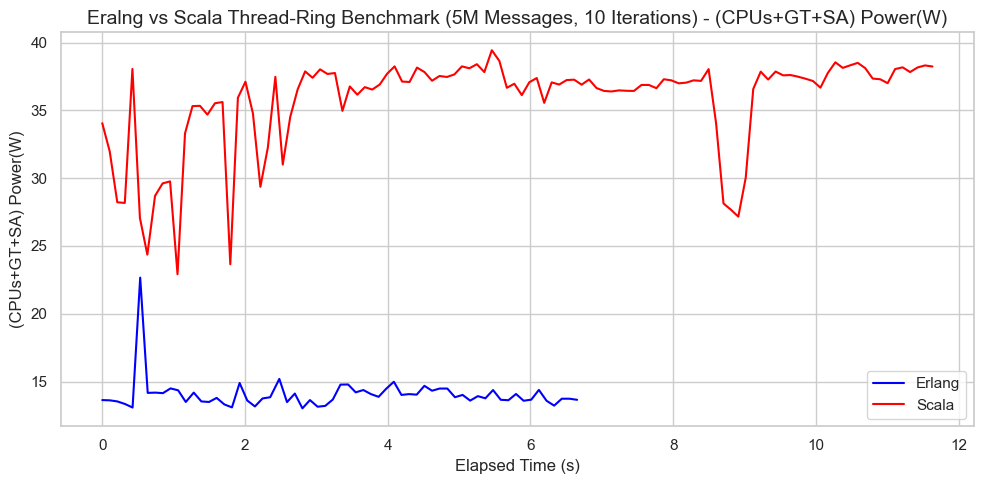

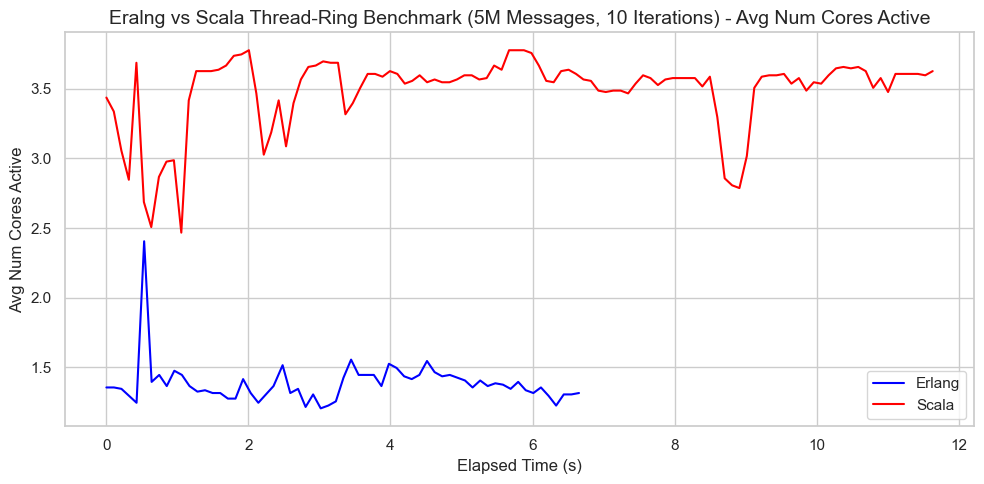

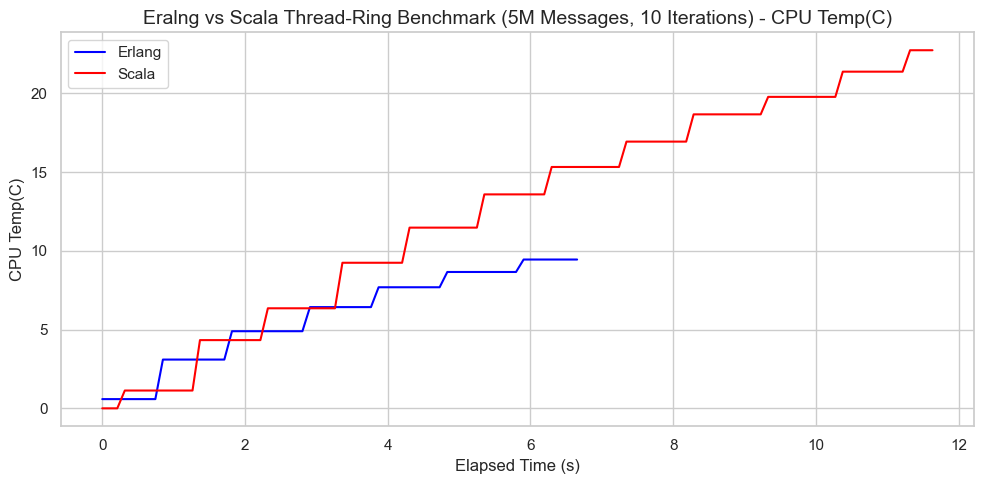

In [39]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [40]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [41]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        34.267850
GT Power(W)               0.024409
DRAM Power(W)             0.301334
(CPUs+GT+SA) Power(W)    35.729286
CPU Temp(C)              12.516893
Avg Num Cores Active      3.486554
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        13.621368
GT Power(W)               0.046868
DRAM Power(W)             0.020529
(CPUs+GT+SA) Power(W)    14.051381
CPU Temp(C)               5.883302
Avg Num Cores Active      1.383254
dtype: float64


Compute Total Energy Consumption

In [42]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/count/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 419.5740042428571 Joules
Erlang Benchmark: 95.0647583471429 Joules
